# Text Classification using Naive Bayes and Sentiment Analysis on Blog Posts

**1. Data Exploration and Preprocessing**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('blogs.csv')

In [3]:
df = pd.DataFrame(dataset)

In [4]:
df

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism
...,...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc


In [5]:
print(df.head())

                                                Data       Labels
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....  alt.atheism
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  alt.atheism
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...  alt.atheism


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB
None


In [7]:
print(df.describe())

                                                     Data       Labels
count                                                2000         2000
unique                                               2000           20
top     Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
freq                                                    1          100


In [8]:
print(df.isnull().sum())

Data      0
Labels    0
dtype: int64


In [9]:
print(df.columns)

Index(['Data', 'Labels'], dtype='object')


In [10]:
# Rename columns for easier access
df.columns = ['Text', 'Category']

In [11]:
!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.4 MB/s eta 0:00:00


In [12]:
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import spacy
import nltk

In [13]:
# Download necessary resources
nltk.download('stopwords')
from nltk.corpus import stopwords

# Load SpaCy language model
nlp = spacy.load("en_core_web_sm")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [14]:
# Advanced Preprocessing with SpaCy
def clean_text_spacy(text):
    """Uses SpaCy to clean and preprocess text."""
    doc = nlp(text.lower())  # Convert to lowercase and process text with SpaCy
    tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct and not token.is_space]
    return " ".join(tokens)

df['Cleaned_Text'] = df['Text'].apply(clean_text_spacy)

In [15]:
# Display some cleaned text samples
print("\nSample Cleaned Text:")
print(df['Cleaned_Text'].head())


Sample Cleaned Text:
0    path cantaloupe.srv.cs.cmu.edu!magnesium.club....
1    newsgroup alt.atheism path cantaloupe.srv.cs.c...
2    path cantaloupe.srv.cs.cmu.edu!das news.harvar...
3    path cantaloupe.srv.cs.cmu.edu!magnesium.club....
4    xref cantaloupe.srv.cs.cmu.edu alt.atheism:534...
Name: Cleaned_Text, dtype: object


In [16]:
# Feature Extraction using TF-IDF
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['Cleaned_Text']).toarray()
y = df['Category']

# Split the Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**2. Naive Bayes Model for Text Classification**

In [18]:
# Evaluation Metrics for Naive Bayes
# Create and train a Naive Bayes classifier
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_nb = nb_model.predict(X_test)

print("\nNaive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb))

print("\nNaive Bayes Accuracy Score:")
print(accuracy_score(y_test, y_pred_nb))


Naive Bayes Classification Report:
                          precision    recall  f1-score   support

             alt.atheism       0.58      0.83      0.68        18
           comp.graphics       0.76      0.72      0.74        18
 comp.os.ms-windows.misc       0.79      1.00      0.88        22
comp.sys.ibm.pc.hardware       0.67      0.88      0.76        25
   comp.sys.mac.hardware       0.81      0.62      0.70        21
          comp.windows.x       0.92      0.44      0.59        25
            misc.forsale       0.78      0.78      0.78        18
               rec.autos       0.76      0.89      0.82        18
         rec.motorcycles       0.93      0.81      0.87        16
      rec.sport.baseball       0.89      0.94      0.92        18
        rec.sport.hockey       0.75      1.00      0.86        15
               sci.crypt       0.79      1.00      0.88        19
         sci.electronics       0.79      0.69      0.73        16
                 sci.med       0.88    

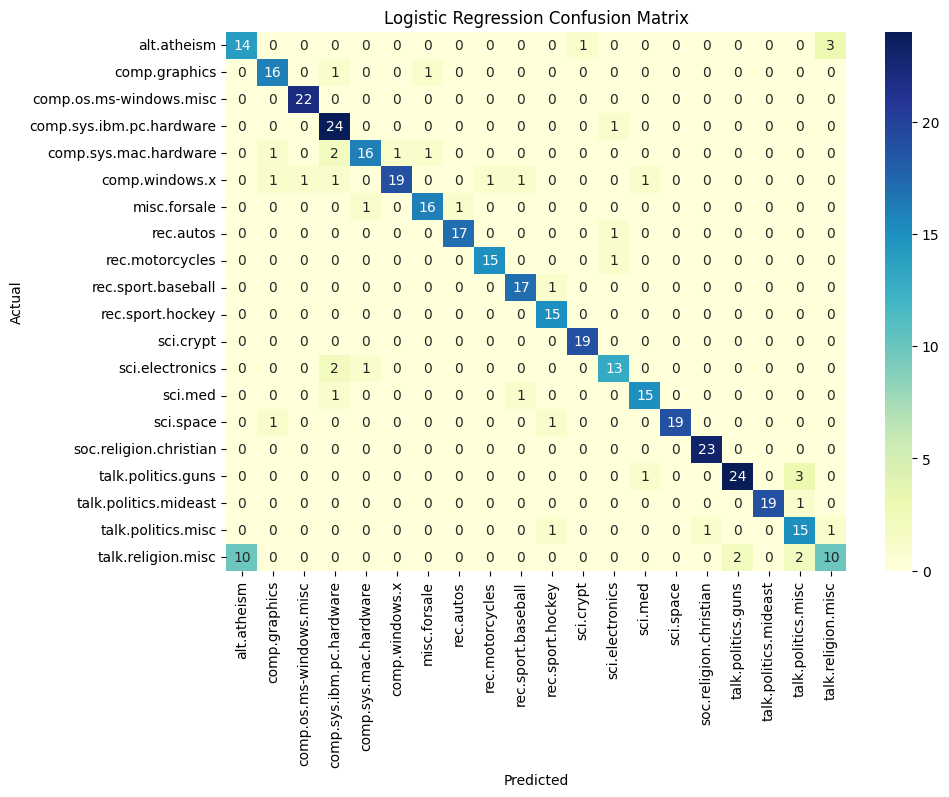

In [21]:
# Confusion Matrix for Logistic Regression
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='YlGnBu', xticklabels=lr_model.classes_, yticklabels=lr_model.classes_)
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**3. Sentiment Analysis**

In [22]:
# Sentiment Analysis using VADER
analyzer = SentimentIntensityAnalyzer()

def analyze_sentiment_vader(text):
    """Analyzes sentiment using VADER."""
    sentiment_score = analyzer.polarity_scores(text)
    if sentiment_score['compound'] > 0.05:
        return "Positive"
    elif sentiment_score['compound'] < -0.05:
        return "Negative"
    else:
        return "Neutral"

df['Sentiment'] = df['Text'].apply(analyze_sentiment_vader)

In [23]:
# Sentiment Distribution
print("\nSentiment Distribution:")
print(df['Sentiment'].value_counts())




Sentiment Distribution:
Sentiment
Positive    1359
Negative     609
Neutral       32
Name: count, dtype: int64


<ipython-input-24-98b6eaec1a54>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=df, order=['Positive', 'Neutral', 'Negative'], palette='coolwarm')


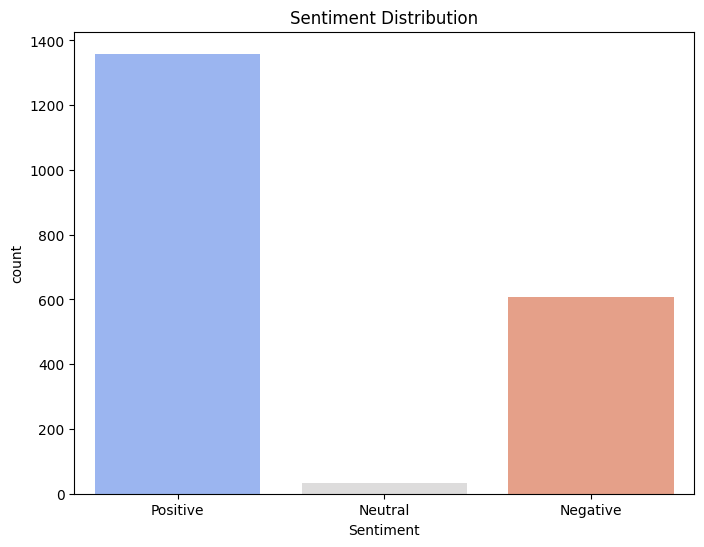

In [24]:
# Visualize Sentiment Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Sentiment', data=df, order=['Positive', 'Neutral', 'Negative'], palette='coolwarm')
plt.title("Sentiment Distribution")
plt.show()

In [25]:
# Sentiment Across Categories
sentiment_category = df.groupby(['Category', 'Sentiment']).size().unstack(fill_value=0)

print("\nSentiment Distribution Across Categories:")
print(sentiment_category)



Sentiment Distribution Across Categories:
Sentiment                 Negative  Neutral  Positive
Category                                             
alt.atheism                     41        1        58
comp.graphics                   11        2        87
comp.os.ms-windows.misc         21        2        77
comp.sys.ibm.pc.hardware        18        1        81
comp.sys.mac.hardware           24        4        72
comp.windows.x                  18        2        80
misc.forsale                     8        8        84
rec.autos                       27        0        73
rec.motorcycles                 30        1        69
rec.sport.baseball              26        1        73
rec.sport.hockey                22        1        77
sci.crypt                       30        0        70
sci.electronics                 19        3        78
sci.med                         30        1        69
sci.space                       32        3        65
soc.religion.christian          28     

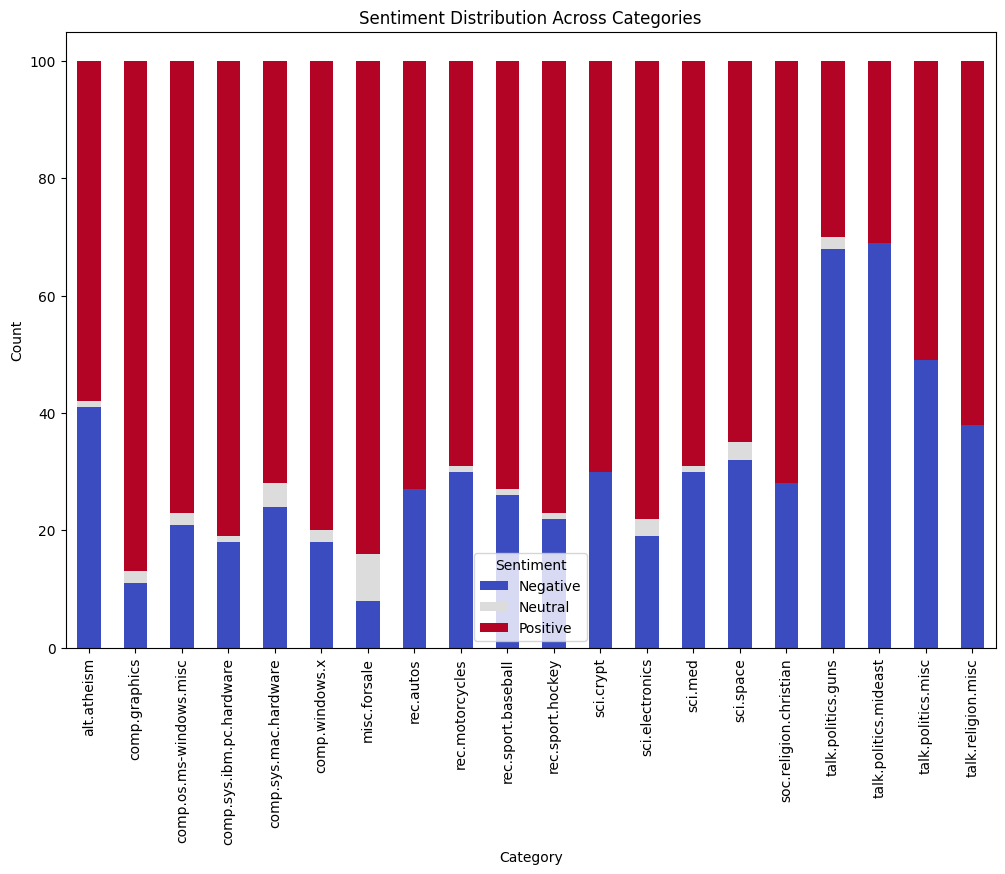

In [26]:
# Visualize Sentiment Across Categories
sentiment_category.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='coolwarm')
plt.title("Sentiment Distribution Across Categories")
plt.xlabel("Category")
plt.ylabel("Count")
plt.legend(title="Sentiment")
plt.show()

In [27]:
# Compare Logistic Regression and Naive Bayes
print("\nModel Comparison:")
print(f"Naive Bayes Accuracy: {accuracy_score(y_test, y_pred_nb)}")
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_lr)}")


Model Comparison:
Naive Bayes Accuracy: 0.8075
Logistic Regression Accuracy: 0.87


**4. Evaluation**

In [28]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import precision_score, recall_score, f1_score

In [29]:
# Evaluate Model Performance
print("\nEvaluating Model Performance...")

# Create and train a Naive Bayes classifier (MultinomialNB in this case)
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

y_pred = nb_classifier.predict(X_test)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Evaluating Model Performance...

Classification Report:
                          precision    recall  f1-score   support

             alt.atheism       0.58      0.83      0.68        18
           comp.graphics       0.76      0.72      0.74        18
 comp.os.ms-windows.misc       0.79      1.00      0.88        22
comp.sys.ibm.pc.hardware       0.67      0.88      0.76        25
   comp.sys.mac.hardware       0.81      0.62      0.70        21
          comp.windows.x       0.92      0.44      0.59        25
            misc.forsale       0.78      0.78      0.78        18
               rec.autos       0.76      0.89      0.82        18
         rec.motorcycles       0.93      0.81      0.87        16
      rec.sport.baseball       0.89      0.94      0.92        18
        rec.sport.hockey       0.75      1.00      0.86        15
               sci.crypt       0.79      1.00      0.88        19
         sci.electronics       0.79      0.69      0.73        16
                 s

In [30]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


# Precision, Recall, F1-Score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"Precision: {precision:.2f}, Recall: {recall:.2f}, F1-Score: {f1:.2f}")

Accuracy: 0.81
Precision: 0.82, Recall: 0.81, F1-Score: 0.80


In [31]:
print("\nSaving processed data and results...")
df.to_csv("processed_blogs_with_sentiment.csv", index=False)
print("Results saved to 'processed_blogs_with_sentiment.csv'.")

print("\nProgram completed successfully!")


Saving processed data and results...
Results saved to 'processed_blogs_with_sentiment.csv'.

Program completed successfully!
